# Loading and Testing Data

In [70]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload
import pandas as pd
from astropy.visualization import hist
from astropy.stats import histogram

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"

datapath="./fire2_clusterdata_pkl_b4n6/" #this is teh path where the data of our tracked clusters is

plot_path="./plots/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

data_start=585
data_end=696

initial_data=list() #list to store data of all the initial data of different cluster families 
later_data=list() #list to store data of all the later data of different cluster families 

for s in range(data_start,data_end,3):
    if (s!=672) and (s!=678):
        fn_clusters_initial=simtype+"_clusters_"+simname+"_snapshot_"+str(s)+".pkl" 

        with open(datapath+fn_clusters_initial, "rb") as input:
            cluster_data_initial= pickle.load(input)


        #print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
        print("####################### Total clusters present in snapshot %d is %d"%(s,len(cluster_data_initial)))
        #print("\n############## Keys to access the data: \n",cluster_data_initial[1].keys())

        initial_data.append(cluster_data_initial) #appending the dictionaries to the list

        #colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
        #colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
        #colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

        #total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
        ############################
        ############################

####################### Total clusters present in snapshot 585 is 14
####################### Total clusters present in snapshot 588 is 12
####################### Total clusters present in snapshot 591 is 9
####################### Total clusters present in snapshot 594 is 7
####################### Total clusters present in snapshot 597 is 5
####################### Total clusters present in snapshot 600 is 3
####################### Total clusters present in snapshot 603 is 7
####################### Total clusters present in snapshot 606 is 8
####################### Total clusters present in snapshot 609 is 6
####################### Total clusters present in snapshot 612 is 11
####################### Total clusters present in snapshot 615 is 15
####################### Total clusters present in snapshot 618 is 8
####################### Total clusters present in snapshot 621 is 19
####################### Total clusters present in snapshot 624 is 19
####################### Total clusters pre

In [2]:
#Running tests
print("This is total no. of cluster_familities",len(initial_data))
print("This is no. of clusters in family 1:",len(initial_data[0]))
print("This is no. of stars in first cluster of family 1",len(initial_data[0][1]["feh"]))


This is total no. of cluster_familities 35
This is no. of clusters in family 1: 14
This is no. of stars in first cluster of family 1 74


In [3]:
#print(initial_data[36])

# Exporting data and statistics

In [4]:
feh_mean=[]
feh_median=[]
feh_stdev=[]
n_clusters=[]
star_count=[]
r_cm=[]
z_cm=[]
r_90=[]

for i in range(len(initial_data)):
    cluster_count=1
    for j in range(len(initial_data[i])):
        feh_mean_temp=np.mean(initial_data[i][cluster_count]["feh"])
        n_clusters_temp=len(initial_data[i])
        feh_median_temp=np.median(initial_data[i][cluster_count]["feh"])
        feh_stdev_temp=np.std(initial_data[i][cluster_count]["feh"])
        star_count.append(len(initial_data[i][cluster_count]["feh"]))
        
        cm_x=initial_data[i][cluster_count]["xcm"]
        cm_y=initial_data[i][cluster_count]["ycm"]
        cm_z=initial_data[i][cluster_count]["zcm"]
        cm_r90=initial_data[i][cluster_count]["r90"]
        
        r_cm_temp=(cm_x**2+cm_y**2)**(1/2)
        r_cm.append(r_cm_temp)
        z_cm.append(cm_z)
        r_90.append(cm_r90)
        
        #print(len(initial_data[i][cluster_count]))
        cluster_count+=1
        feh_mean.append(feh_mean_temp)
        feh_median.append(feh_median_temp)
        feh_stdev.append(feh_stdev_temp)
        n_clusters.append(n_clusters_temp)
        
        
feh_mean=np.array(feh_mean)
feh_median=np.array(feh_median)
feh_stdev=np.array(feh_stdev)
n_clusters=np.array(n_clusters)
star_count=np.array(star_count)
r_cm=np.array(r_cm)
z_cm=np.array(z_cm)

df=pd.DataFrame({"star_count":star_count,"R_cm":r_cm,"z_cm":z_cm,"r_90":r_90,"feh_mean":feh_mean,"feh_median":feh_median,"feh_stdev":feh_stdev}) 
df.to_excel("clusters_metallicities_b4n6.xlsx")

In [5]:
print(len(r_cm))
print(len(star_count))
print((n_clusters))

252
252
[14 14 14 14 14 14 14 14 14 14 14 14 14 14 12 12 12 12 12 12 12 12 12 12
 12 12  9  9  9  9  9  9  9  9  9  7  7  7  7  7  7  7  5  5  5  5  5  3
  3  3  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  6  6  6  6  6  6 11
 11 11 11 11 11 11 11 11 11 11 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15  8  8  8  8  8  8  8  8 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 12
 12 12 12 12 12 12 12 12 12 12 12  6  6  6  6  6  6 11 11 11 11 11 11 11
 11 11 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13  1  6  6  6  6  6  6
  4  4  4  4  1  4  4  4  4  2  2  6  6  6  6  6  6  4  4  4  4  2  2  5
  5  5  5  5  5  5  5  5  5  4  4  4  4  6  6  6  6  6  6  2  2  3  3  3
  7  7  7  7  7  7  7  5  5  5  5  5]


# Visualizations using above excel file

In [9]:
df_read = pd.read_excel ('clusters_metallicities_b4n6.xlsx')
df_read.keys()

R_cm=df_read["R_cm"]
feh_stdev=df_read["feh_stdev"]
star_count=df_read["star_count"]

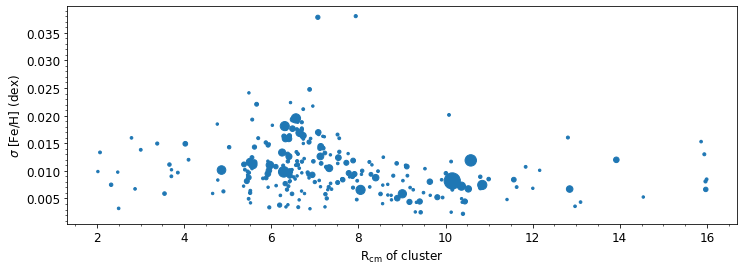

In [10]:


fig0=plt.figure()
fig0.set_size_inches(12,4)
ax1=fig0.add_subplot(111)
plot_name="feh_stdev vs R_cm"

ax1.set_xlabel(r"${\mathrm{R_{cm}}}$ of cluster",fontsize=12)
ax1.set_ylabel(r"${\sigma}$ [Fe/H] (dex)",fontsize=12)  
ax1.scatter(R_cm,feh_stdev,s=star_count)
#ax1.text(25,370,"open clusters in m12i_res7100_mhdcv",fontsize=12)
#ax1.set(xlim=[4, 60])
ax1.minorticks_on()
#fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=100)


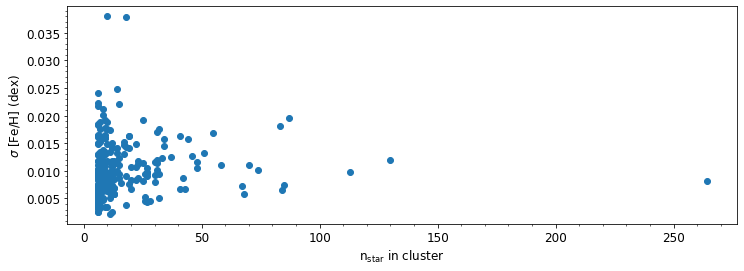

In [11]:
fig0=plt.figure()
fig0.set_size_inches(12,4)
ax1=fig0.add_subplot(111)
plot_name="feh_stdev vs star_count"

ax1.set_xlabel(r"${\mathrm{n_{star}}}$ in cluster",fontsize=12)
ax1.set_ylabel(r"${\sigma}$ [Fe/H] (dex)",fontsize=12)  
ax1.scatter(star_count,feh_stdev)
#ax1.text(25,370,"open clusters in m12i_res7100_mhdcv",fontsize=12)
#ax1.set(xlim=[4, 60])
ax1.minorticks_on()
#fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=100)


In [12]:
print("Total no. of clusters present",len(star_count))
print("Total no. of stds collected",len(feh_stdev))
df1=pd.DataFrame(star_count,columns=["star_count"],index=None)
df2= pd.value_counts(df1.star_count).to_frame().reset_index()
df2.columns = ['star_count','n']
df2.to_excel("star_count_clusters.xlsx")
a=np.array(df2.star_count)
a.sort()
print(a)

mean_stdevs=[]
mean_means=[]
for i in a:
    keep=np.where(star_count==i)
    mean_stdevs.append(np.mean(feh_stdev[keep]))
    mean_means.append(np.mean(feh_mean[keep]))
print(mean_stdevs)

plt.scatter(a,mean_stdevs)
plt.xlabel("# Stars in Cluster")
plt.ylabel("Mean STDEV [Fe/H]")
plt.savefig("Mean STDEV vs #Stars_b4n6.jpg",bbox_inches='tight',dpi=100)

Total no. of clusters present 252
Total no. of stds collected 252
[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  22  23  25
  26  27  28  30  31  32  33  34  37  41  42  43  44  46  48  51  55  58
  67  68  70  74  83  84  85  87 113 130 264]


KeyError: 'key of type tuple not found and not a MultiIndex'

0      74
1      58
2      31
3      20
4      19
       ..
247    19
248    15
249     7
250     7
251     6
Name: star_count, Length: 252, dtype: int64


(array([223.,  17.,   6.,   3.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  6. ,  31.8,  57.6,  83.4, 109.2, 135. , 160.8, 186.6, 212.4,
        238.2, 264. ]),
 <BarContainer object of 10 artists>)

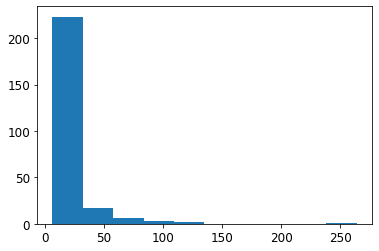

In [29]:
#### plt.bar(n_stars,feh_stdev)
print(star_count)
plt.hist(star_count)
#print(star_count)

# Bar graph of no. of stars frequency in clusters observed

Maximum no. of items in bin is: 58.0
maxbin is: 6.0  to  7.0


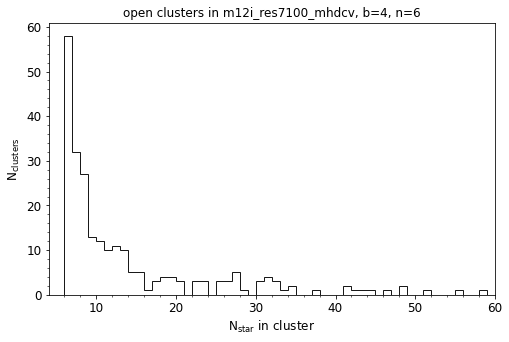

In [30]:
fig1=plt.figure()
fig1.set_size_inches(8,5)
ax1=fig1.add_subplot(111)
plot_name="frequency of no. of stars in observed clusters_b4n6"
n,nbins,edges=ax1.hist(star_count,bins=max(star_count)-min(star_count),ec="black",alpha=0.9,histtype='step')
print("Maximum no. of items in bin is:",n.max())
bin_max = np.where(n == n.max())
#elem = np.argmax(n)
#print(bins[elem])
print ('maxbin is:', nbins[bin_max][0]," to ",nbins[bin_max[0][0]+1])
ax1.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
ax1.set_ylabel(r"${\mathrm{N_{clusters}}}$",fontsize=12)  
ax1.set_title("open clusters in m12i_res7100_mhdcv, b=4, n=6",fontsize=12)
ax1.set(xlim=[4, 60])
ax1.minorticks_on()
fig1.savefig(plot_path+plot_name+".jpg",bbox_inches='tight',dpi=100)

# Calculating Mean and Standard Deviation of Metallicities of each clusters

# A function that generates histogram for any metal type

In [103]:

def generate_histograms(metal_key,metal_text):
    feh_mean=[]
    feh_stdev=[]
    feh_stdev_local=[]
    starcount_local=[]
    for i in range(len(initial_data)):
        cluster_count=1
        feh_stdev_local_temp=[]
        for j in range(len(initial_data[i])):
            feh_stdev_temp=np.std(initial_data[i][cluster_count][metal_key])
            feh_mean_temp=np.mean(initial_data[i][cluster_count][metal_key])
        
            cluster_count+=1
            feh_stdev.append(feh_stdev_temp)
            feh_mean.append(feh_mean_temp)
            feh_stdev_local_temp.append(feh_stdev_temp)
        
        feh_stdev_local.append(np.mean(feh_stdev_local_temp))


    fig1=plt.figure()
    fig1.set_size_inches(6,7)
    ax1=fig1.add_subplot(211)
    ax2=fig1.add_subplot(212)


    plot_name=metal_key+"_histogram_"+simname+"_all_clusters_b4n6"
    n,nbins,edges=ax1.hist(feh_mean,bins=7,ec="black",alpha=0.9)
    print("Maximum no. of items in bin is:",n.max())
    bin_max = np.where(n == n.max())
    #elem = np.argmax(n)
    #print(bins[elem])
    print ('maxbin is:', nbins[bin_max][0]," to ",nbins[bin_max[0][0]+1])
    ax1.set_xlabel("Mean "+metal_text,fontsize=12)
    ax1.set_ylabel("No. of Clusters",fontsize=12)  
    ax1.set_title("All Cluster Families (586,589,592,...694)")
    #ax1.set(xticks=nbins,xlim=[np.min(feh_mean)-np.min(feh_mean)/16, np.max(feh_mean)])

    counts, bin_edges = histogram(feh_stdev, bins="freedman") 
    ncounts=counts/(len(feh_stdev)*1.0)

    binwidth = bin_edges[1] - bin_edges[0]
    bin_middles = bin_edges[0:-1] + binwidth/2.

    ax2.plot(bin_middles, ncounts, label='connect the dot', color='orange', lw=6) #linewidth exaggerated here

    #n,bins,edges=ax2.hist(feh_stdev,bins=int(len(feh_stdev)**(1/3)),ec="black",alpha=0.9)
    feh_stdev_mean=np.mean(feh_stdev)
    #n,bins,edges=ax2.hist(feh_stdev,bins='freedman',ec="black",alpha=0.9)
    ax2.set_xlabel("STDEV of "+metal_text,fontsize=12)
    ax2.set_ylabel("No. of Clusters",fontsize=12)
    ax2.set_title("Mean Sigma: "+str(round(feh_stdev_mean,4)))  
    #ax2.set_title("All 37 Clusters (586,589,592,...694)")
    #ax2.set(xticks=bins,xlim=[np.min(feh_stdev)-np.min(feh_stdev)/4, np.max(feh_stdev)])
    plt.tight_layout()
    fig1.savefig(plot_path+plot_name+".jpg",bbox_inches='tight',dpi=100)
    print("Maximum no. of items in bin is:",n.max())
    bin_max = np.where(n == n.max())
    #elem = np.argmax(n)
    #print(bins[elem])
    print ('maxbin is:', bins[bin_max][0])
    return_text="generated_figure: "+plot_name+".png"
    return return_text


Maximum no. of items in bin is: 97.0
maxbin is: 0.32030493  to  0.3482387
Maximum no. of items in bin is: 97.0
maxbin is: -24.799999999999997


'generated_figure: mgh_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

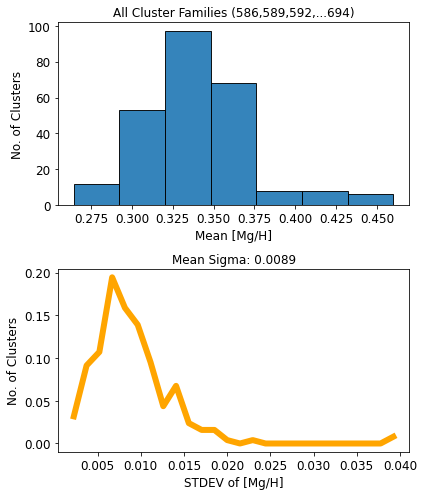

In [104]:
generate_histograms("mgh","[Mg/H]")

Maximum no. of items in bin is: 95.0
maxbin is: 0.5706681  to  0.6029237
Maximum no. of items in bin is: 95.0
maxbin is: -24.799999999999997


'generated_figure: oh_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

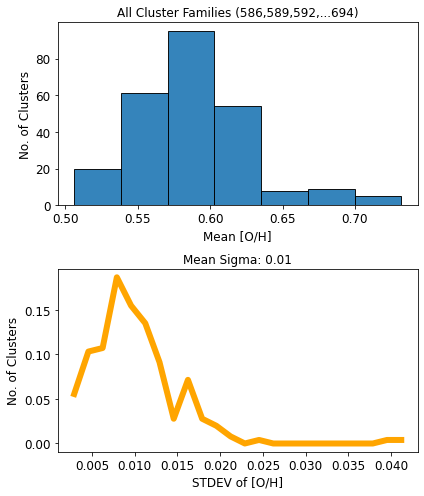

In [105]:
generate_histograms("oh","[O/H]")

Maximum no. of items in bin is: 105.0
maxbin is: 0.4718537  to  0.5121232
Maximum no. of items in bin is: 105.0
maxbin is: -24.799999999999997


'generated_figure: nh_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

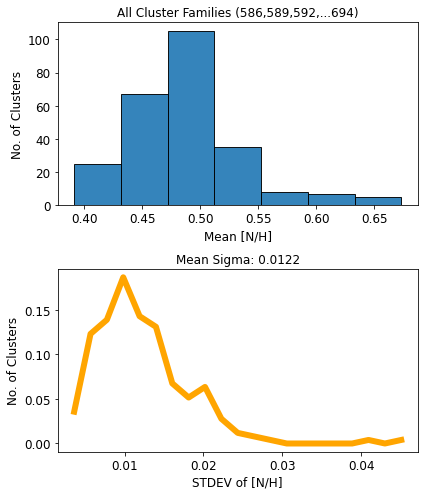

In [106]:
generate_histograms("nh","[N/H]")

Maximum no. of items in bin is: 99.0
maxbin is: 0.56241417  to  0.5902866
Maximum no. of items in bin is: 99.0
maxbin is: -24.799999999999997


'generated_figure: neh_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

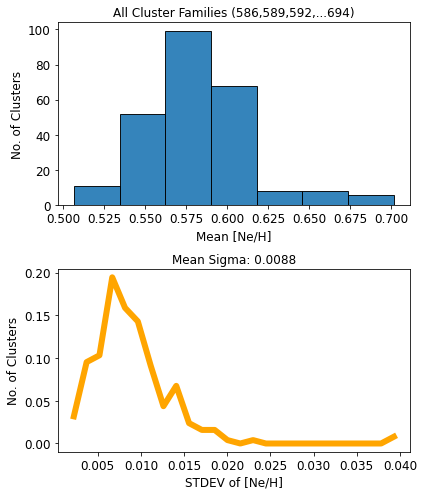

In [107]:
generate_histograms("neh","[Ne/H]")

Maximum no. of items in bin is: 96.0
maxbin is: 0.35646576  to  0.38599765
Maximum no. of items in bin is: 119.0
maxbin is: 0.001995676


'generated_figure: sih_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

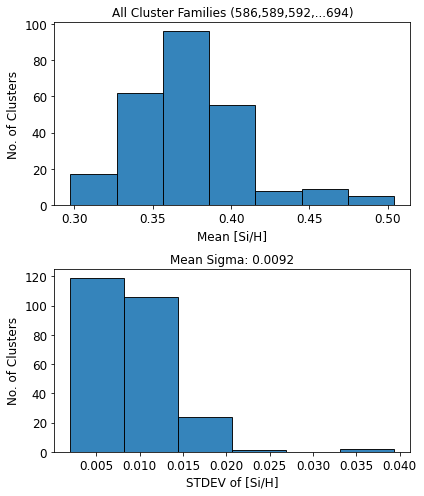

In [90]:
generate_histograms("sih","[Si/H]")

Maximum no. of items in bin is: 99.0
maxbin is: 0.30901557  to  0.3390745
Maximum no. of items in bin is: 118.0
maxbin is: 0.002006965


'generated_figure: sh_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

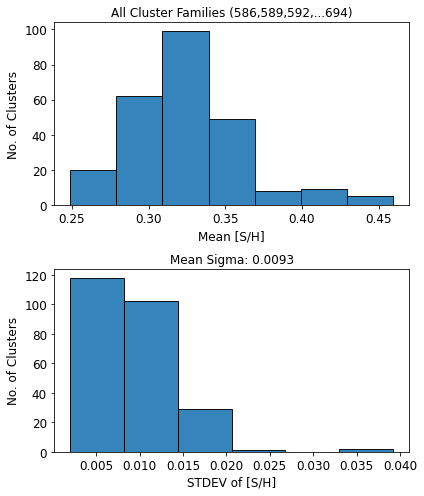

In [91]:
generate_histograms("sh","[S/H]")

Maximum no. of items in bin is: 100.0
maxbin is: 0.036664467  to  0.06722173
Maximum no. of items in bin is: 114.0
maxbin is: 0.0020192836


'generated_figure: cah_histogram_m12i_res7100_mhdcv_all_clusters_b4n6.png'

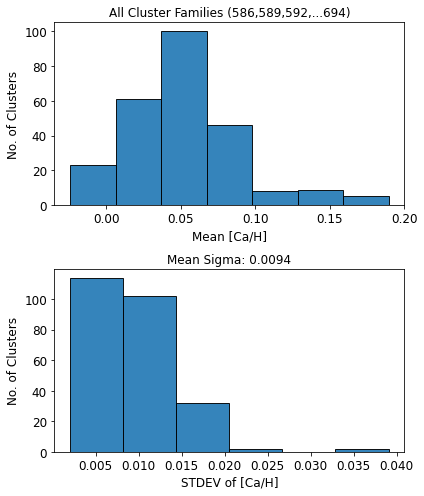

In [92]:
generate_histograms("cah","[Ca/H]")

# Bar graphs

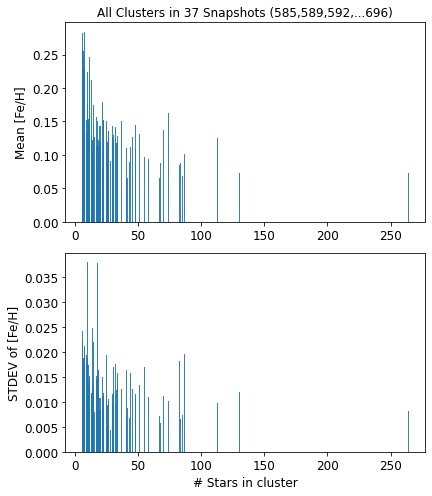

In [64]:
fig2=plt.figure()
fig2.set_size_inches(6,7)
ax1=fig2.add_subplot(211)
ax2=fig2.add_subplot(212)


plot_name="feh_bargraph"+simname+"_all_clusters_b4n6"
ax1.bar(star_count,feh_mean,alpha=0.9)
#ax1.set_xlabel("No. of stars present",fontsize=12)
ax1.set_ylabel("Mean [Fe/H]",fontsize=12)  
ax1.set_title("All Clusters in 37 Snapshots (585,589,592,...696)")

ax2.bar(star_count,feh_stdev,alpha=0.9)
ax2.set_xlabel("# Stars in cluster",fontsize=12)
ax2.set_ylabel("STDEV of [Fe/H]",fontsize=12)  
plt.tight_layout()
fig2.savefig(plot_path+plot_name+".jpg",bbox_inches='tight',dpi=100)

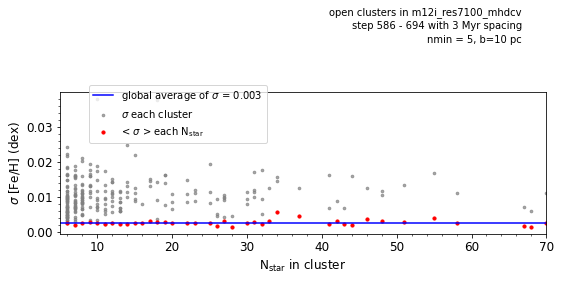

In [93]:
fig3=plt.figure()
fig3.set_size_inches(8,5)
ax2=fig3.add_subplot(111)

plot_name="feh_scatter"+simname+"_all_clusters_b4n6"

#ax2.set_title("Clusters from all 37 Snapshots (586,589,592,...694)")
ax2.scatter(star_count,feh_stdev,s=7,c="grey",alpha=0.7,label=r"${\sigma}$ each cluster")
ax2.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
ax2.set_ylabel(r"${\sigma}$ [Fe/H] (dex)",fontsize=12)  
ax2.scatter(a,mean_stdevs,c="red",s=10,label=r"< ${\sigma}$ > each ${\mathrm{N_{star}}}$")
global_mean=np.mean(mean_stdevs)
ax2.axhline(y=global_mean,c="blue",label=r"global average of ${\sigma}$ = %.3f"%global_mean)
ax2.text(41,0.062,"open clusters in m12i_res7100_mhdcv")
ax2.text(44,0.058,"step 586 - 694 with 3 Myr spacing")
ax2.text(54,0.054,"nmin = 5, b=10 pc",ha="left")
#ax2.text(40,0.055,r"global average of ${\sigma}$  = %.3f"%global_mean,fontsize=12,c="blue")
ax2.set(xlim=[5,70])
ax2.minorticks_on()
ax2.legend(bbox_to_anchor=(0.05,0.85), loc='center left')
plt.tight_layout()
fig3.savefig(plot_path+plot_name+".jpg",bbox_inches='tight',dpi=100)

# Creating $\sigma$ Metallicity scatter for given $N_{star}$ in cluster

In [50]:
def generate_scatterplots(metal_key,metal_text):

    feh_mean=[]
    feh_median=[]
    feh_stdev=[]
    n_clusters=[]
    star_count=[]

    for i in range(len(initial_data)):
        cluster_count=1
        for j in range(len(initial_data[i])):
            feh_mean_temp=np.mean(initial_data[i][cluster_count][metal_key])
            n_clusters_temp=len(initial_data[i])
            feh_median_temp=np.median(initial_data[i][cluster_count][metal_key])
            feh_stdev_temp=np.std(initial_data[i][cluster_count][metal_key])
            star_count.append(len(initial_data[i][cluster_count][metal_key]))
            cluster_count+=1
            feh_mean.append(feh_mean_temp)
            feh_median.append(feh_median_temp)
            feh_stdev.append(feh_stdev_temp)
            n_clusters.append(n_clusters_temp)

    feh_mean=np.array(feh_mean)
    feh_median=np.array(feh_median)
    feh_stdev=np.array(feh_stdev)
    n_clusters=np.array(n_clusters)
    star_count=np.array(star_count)

    
    df1=pd.DataFrame(star_count,columns=["star_count"],index=None)
    df2= pd.value_counts(df1.star_count).to_frame().reset_index()
    df2.columns = ['star_count','n']
    #df2.to_excel("star_count_clusters.xlsx")
    a=np.array(df2.star_count)
    na=np.array(df2.n)
    a.sort()
    print(a)

    mean_stdevs=[]

    for i in a:
        keep=np.where((star_count==i))
        mean_stdevs.append(np.mean(feh_stdev[keep]))

    fig4=plt.figure()
    fig4.set_size_inches(8,5)
    ax2=fig4.add_subplot(111)

    plot_name=metal_key+"_scatter_"+simname+"_all_clusters_b4n6"

    #ax2.set_title("Clusters from all 37 Snapshots (586,589,592,...694)")
    ax2.scatter(star_count,feh_stdev,s=7,c="grey",alpha=0.7,label=r"${\sigma}$ each cluster")
    ax2.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
    ax2.set_ylabel(r"${\sigma}$ "+ metal_text +"(dex)",fontsize=12)  
    ax2.scatter(a,mean_stdevs,c="red",s=10,label=r"< ${\sigma}$ > each ${\mathrm{N_{star}}}$")
    global_mean=np.mean(mean_stdevs)
    ax2.axhline(y=global_mean,c="blue",label=r"global average of ${\sigma}$ = %.3f"%global_mean)
    ax2.text(41,0.040,"open clusters in m12i_res7100_mhdcv")
    ax2.text(44,0.038,"step 586 - 694 with 3 Myr spacing")
    ax2.text(54,0.036,"nmin = 6, b=4 pc",ha="left")
    #ax2.text(40,0.055,r"global average of ${\sigma}$  = %.3f"%global_mean,fontsize=12,c="blue")
    ax2.set(xlim=[5,70])
    ax2.minorticks_on()
    ax2.legend(bbox_to_anchor=(0.04,0.85), loc='center left')
    plt.tight_layout()
    fig4.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=100)
    return_text="generated_figure: "+plot_name+".jpg"
    return return_text


[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  22  23  25
  26  27  28  30  31  32  33  34  37  41  42  43  44  46  48  51  55  58
  67  68  70  74  83  84  85  87 113 130 264]


'generated_figure: mgh_scatter_m12i_res7100_mhdcv_all_clusters_b4n6.jpg'

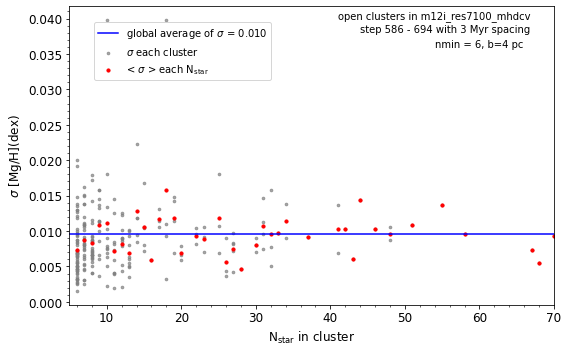

In [51]:
generate_scatterplots("mgh","[Mg/H]")

[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  22  23  25
  26  27  28  30  31  32  33  34  37  41  42  43  44  46  48  51  55  58
  67  68  70  74  83  84  85  87 113 130 264]


'generated_figure: cah_scatter_m12i_res7100_mhdcv_all_clusters_b4n6.jpg'

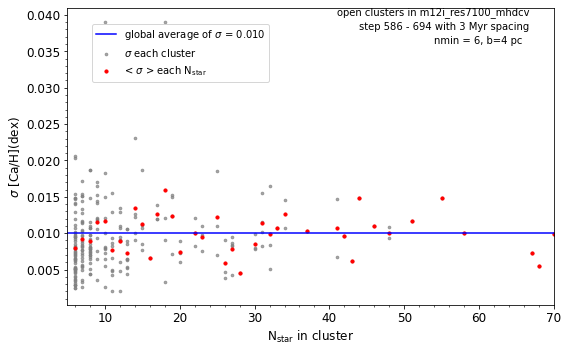

In [52]:
generate_scatterplots("cah","[Ca/H]")

# Sanity check_for [Mg/Fe]

Total no. of clusters present 252
Total no. of stds collected 252
[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  22  23  25
  26  27  28  30  31  32  33  34  37  41  42  43  44  46  48  51  55  58
  67  68  70  74  83  84  85  87 113 130 264]
[0.0024927356, 0.0020632467, 0.0024283421, 0.0028008951, 0.0026390776, 0.0023680306, 0.002659351, 0.0022532179, 0.002319333, 0.0026513725, 0.002548966, 0.0030974683, 0.0027515097, 0.0027577132, 0.002604379, 0.0025849717, 0.0025025483, 0.0024807956, 0.001536617, 0.003103709, 0.0014294479, 0.002545992, 0.002672045, 0.0022285746, 0.0030159273, 0.0057032346, 0.004479349, 0.0023439198, 0.0029770941, 0.0023238403, 0.0018628718, 0.003589762, 0.003206227, 0.0029436967, 0.0038844247, 0.002555723, 0.001561207, 0.001296834, 0.0026297315, 0.002654592, 0.0023327994, 0.0015008983, 0.001717374, 0.0034045107, 0.001976574, 0.002379961, 0.0018530199]


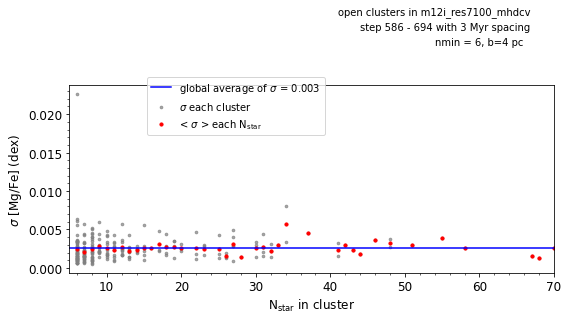

In [53]:
mgfe_stdev=[]
n_clusters=[]
star_count=[]

for i in range(len(initial_data)):
    cluster_count=1
    for j in range(len(initial_data[i])):
        n_clusters_temp=len(initial_data[i])
        mgfe_stdev_temp=np.std(initial_data[i][cluster_count]["mgfe"])
        star_count.append(len(initial_data[i][cluster_count]["mgfe"]))
        #print(len(initial_data[i][cluster_count]))
        cluster_count+=1
        mgfe_stdev.append(mgfe_stdev_temp)
        n_clusters.append(n_clusters_temp)
        
mgfe_stdev=np.array(mgfe_stdev)
n_clusters=np.array(n_clusters)
star_count=np.array(star_count)
df=pd.DataFrame({"mgfe_stdev":mgfe_stdev}) 
df.to_excel("mgfe_clusters_metallicities.xlsx")


print("Total no. of clusters present",len(star_count))
print("Total no. of stds collected",len(mgfe_stdev))
df1=pd.DataFrame(star_count,columns=["star_count"],index=None)
df2= pd.value_counts(df1.star_count).to_frame().reset_index()
df2.columns = ['star_count','n']
df2.to_excel("mgfe_star_count_clusters.xlsx")
a=np.array(df2.star_count)
a.sort()
print(a)

mean_stdevs=[]
for i in a:
    keep=np.where(star_count==i)
    mean_stdevs.append(np.mean(mgfe_stdev[keep]))
    
print(mean_stdevs)


fig3=plt.figure()
fig3.set_size_inches(8,5)
ax2=fig3.add_subplot(111)

plot_name="test_mgfe_scatter"+simname+"_all_clusters_b4n6"

#ax2.set_title("Clusters from all 37 Snapshots (586,589,592,...694)")
ax2.scatter(star_count,mgfe_stdev,s=7,c="grey",alpha=0.7,label=r"${\sigma}$ each cluster")
ax2.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
ax2.set_ylabel(r"${\sigma}$ [Mg/Fe] (dex)",fontsize=12)  
ax2.scatter(a,mean_stdevs,c="red",s=10,label=r"< ${\sigma}$ > each ${\mathrm{N_{star}}}$")
global_mean=np.mean(mean_stdevs)
ax2.axhline(y=global_mean,c="blue",label=r"global average of ${\sigma}$ = %.3f"%global_mean)
ax2.text(41,0.033,"open clusters in m12i_res7100_mhdcv")
ax2.text(44,0.031,"step 586 - 694 with 3 Myr spacing")
ax2.text(54,0.029,"nmin = 6, b=4 pc",ha="left")
#ax2.text(40,0.055,r"global average of ${\sigma}$  = %.3f"%global_mean,fontsize=12,c="blue")
ax2.set(xlim=[5,70])
ax2.minorticks_on()
ax2.legend(bbox_to_anchor=(0.15,0.89), loc='center left')
plt.tight_layout()
fig3.savefig(plot_path+plot_name+".jpg",bbox_inches='tight',dpi=100)

# Sanity check [O/Fe]

Total no. of clusters present 1317
Total no. of stds collected 1317
[  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  43  47  49  50  52  53  54  55  56  58  59  60  62  65  66  69  75
  78  79  83  91  92 101 105 107 110 115 122 142 167 190 191 202 270]
[0.0017152271, 0.0017873852, 0.0017917013, 0.0018370305, 0.0015969872, 0.0017890825, 0.002342155, 0.0017499231, 0.002541832, 0.0021724622, 0.0019801501, 0.0015983192, 0.002022888, 0.0032965043, 0.001740251, 0.001949421, 0.001970382, 0.0020200575, 0.0015742696, 0.003122998, 0.0015727724, 0.002034835, 0.002515072, 0.0015377704, 0.0018203625, 0.001610683, 0.0017605047, 0.002126106, 0.001703563, 0.0022751584, 0.001936424, 0.0033456208, 0.002373931, 0.0015211646, 0.0015556782, 0.0015575254, 0.0019751496, 0.0019401885, 0.0031239018, 0.002320204, 0.0059484555, 0.0020384951, 0.0070427265, 0.0024111876, 0.002255644, 0.0029782893, 0.0015428985, 

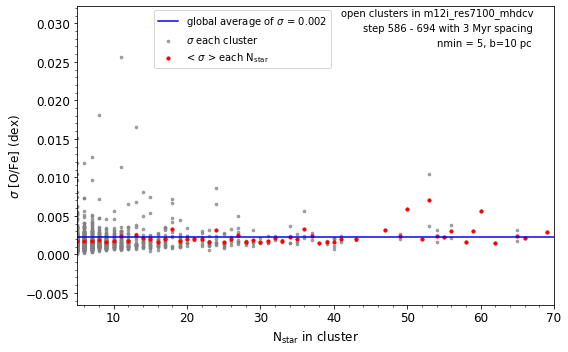

In [23]:
ofe_stdev=[]
n_clusters=[]
star_count=[]

for i in range(len(initial_data)):
    cluster_count=1
    for j in range(len(initial_data[i])):
        n_clusters_temp=len(initial_data[i])
        ofe_stdev_temp=np.std(initial_data[i][cluster_count]["ofe"])
        star_count.append(len(initial_data[i][cluster_count]["ofe"]))
        #print(len(initial_data[i][cluster_count]))
        cluster_count+=1
        ofe_stdev.append(ofe_stdev_temp)
        n_clusters.append(n_clusters_temp)
        
ofe_stdev=np.array(ofe_stdev)
n_clusters=np.array(n_clusters)
star_count=np.array(star_count)
df=pd.DataFrame({"ofe_stdev":ofe_stdev}) 
df.to_excel("ofe_clusters_metallicities.xlsx")


print("Total no. of clusters present",len(star_count))
print("Total no. of stds collected",len(ofe_stdev))
df1=pd.DataFrame(star_count,columns=["star_count"],index=None)
df2= pd.value_counts(df1.star_count).to_frame().reset_index()
df2.columns = ['star_count','n']
df2.to_excel("ofe_star_count_clusters.xlsx")
a=np.array(df2.star_count)
a.sort()
print(a)

mean_stdevs=[]
for i in a:
    keep=np.where(star_count==i)
    mean_stdevs.append(np.mean(ofe_stdev[keep]))
    
print(mean_stdevs)


fig3=plt.figure()
fig3.set_size_inches(8,5)
ax2=fig3.add_subplot(111)

plot_name="test_ofe_scatter"+simname+"_all_clusters"

#ax2.set_title("Clusters from all 37 Snapshots (586,589,592,...694)")
ax2.scatter(star_count,ofe_stdev,s=7,c="grey",alpha=0.7,label=r"${\sigma}$ each cluster")
ax2.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
ax2.set_ylabel(r"${\sigma}$ [O/Fe] (dex)",fontsize=12)  
ax2.scatter(a,mean_stdevs,c="red",s=10,label=r"< ${\sigma}$ > each ${\mathrm{N_{star}}}$")
global_mean=np.mean(mean_stdevs)
ax2.axhline(y=global_mean,c="blue",label=r"global average of ${\sigma}$ = %.3f"%global_mean)
ax2.text(41,0.031,"open clusters in m12i_res7100_mhdcv")
ax2.text(44,0.029,"step 586 - 694 with 3 Myr spacing")
ax2.text(54,0.027,"nmin = 5, b=10 pc",ha="left")
#ax2.text(40,0.055,r"global average of ${\sigma}$  = %.3f"%global_mean,fontsize=12,c="blue")
ax2.set(xlim=[5,70])
ax2.minorticks_on()
ax2.legend(bbox_to_anchor=(0.15,0.89), loc='center left')
plt.tight_layout()
fig3.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=100)

# Age of stars in star clusters

Total no. of clusters present 1317
Total no. of stds collected 1317
[  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  43  47  49  50  52  53  54  55  56  58  59  60  62  65  66  69  75
  78  79  83  91  92 101 105 107 110 115 122 142 167 190 191 202 270]
[0.31784964092047624, 0.36421427735624223, 0.37189210203655004, 0.3714863986575436, 0.38472479109808644, 0.42477374012412067, 0.45778357738571673, 0.3799293533639531, 0.41730762748876654, 0.43821750734836623, 0.4366844683332636, 0.4366252445642527, 0.4772327040873804, 0.4867670872348279, 0.3845645598589187, 0.4065524463995474, 0.49025131319963133, 0.5764344339837212, 0.5524128569497799, 0.446723677323755, 0.5328823458895224, 0.4500540138810908, 0.47784584417378784, 0.5214296313953355, 0.37070711846121285, 0.5102878049805716, 0.5632733393492373, 0.5401530071962581, 0.37620381280233645, 0.42751736452550704, 0.6348983225622941, 0.48808303

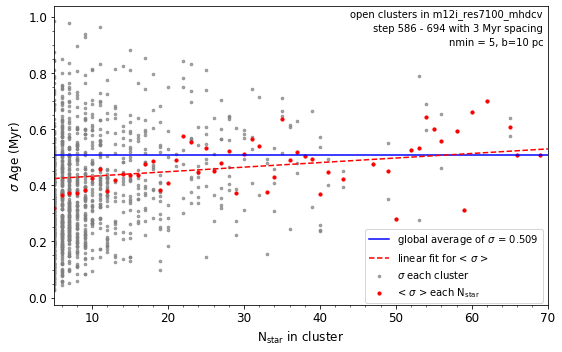

In [24]:
age_stdev=[]
n_clusters=[]
star_count=[]

for i in range(len(initial_data)):
    cluster_count=1
    for j in range(len(initial_data[i])):
        n_clusters_temp=len(initial_data[i])
        age_stdev_temp=np.std(initial_data[i][cluster_count]["age"]*1000)
        star_count.append(len(initial_data[i][cluster_count]["age"]))
        #print(len(initial_data[i][cluster_count]))
        cluster_count+=1
        age_stdev.append(age_stdev_temp)
        n_clusters.append(n_clusters_temp)
        
age_stdev=np.array(age_stdev)
n_clusters=np.array(n_clusters)
star_count=np.array(star_count)
df=pd.DataFrame({"age_stdev":age_stdev}) 
df.to_excel("age_clusters_metallicities.xlsx")


print("Total no. of clusters present",len(star_count))
print("Total no. of stds collected",len(age_stdev))
df1=pd.DataFrame(star_count,columns=["star_count"],index=None)
df2= pd.value_counts(df1.star_count).to_frame().reset_index()
df2.columns = ['star_count','n']
a=np.array(df2.star_count)
a.sort()
print(a)

mean_stdevs=[]
for i in a:
    keep=np.where(star_count==i)
    mean_stdevs.append(np.mean(age_stdev[keep]))
    
print(mean_stdevs)


fig3=plt.figure()
fig3.set_size_inches(8,5)
ax2=fig3.add_subplot(111)

plot_name="test_age_scatter"+simname+"_all_clusters"

#ax2.set_title("Clusters from all 37 Snapshots (586,589,592,...694)")
ax2.scatter(star_count,age_stdev,s=7,c="grey",alpha=0.7,label=r"${\sigma}$ each cluster")
ax2.set_xlabel(r"${\mathrm{N_{star}}}$ in cluster",fontsize=12)
ax2.set_ylabel(r"${\sigma}$ Age (Myr)",fontsize=12)  
ax2.scatter(a,mean_stdevs,c="red",s=10,label=r"< ${\sigma}$ > each ${\mathrm{N_{star}}}$")
global_mean=np.mean(mean_stdevs)
ax2.axhline(y=global_mean,c="blue",label=r"global average of ${\sigma}$ = %.3f"%global_mean)
m,b=np.polyfit(a,mean_stdevs,1)
ax2.plot(a,m*a+b,c="red",linestyle="dashed",label=r"linear fit for < ${\sigma}$ >")
ax2.text(44,1.0,"open clusters in m12i_res7100_mhdcv")
ax2.text(47,0.95,"step 586 - 694 with 3 Myr spacing")
ax2.text(57,0.90,"nmin = 5, b=10 pc",ha="left")
#ax2.text(40,0.055,r"global average of ${\sigma}$  = %.3f"%global_mean,fontsize=12,c="blue")
ax2.set(xlim=[5,70])
ax2.minorticks_on()
ax2.legend(bbox_to_anchor=(0.62,0.13), loc='center left')
plt.tight_layout()
fig3.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=100)

# Intrinsic abundance scatter Table generation